# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [3]:
!pip install palmerpenguins

from palmerpenguins import load_penguins
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.


--- kNN (k=3) ---
Confusion Matrix:
[[43  1  0]
 [ 0 20  0]
 [ 0  0 36]]
Overall Accuracy: 0.99

--- kNN (k=5) ---
Confusion Matrix:
[[44  0  0]
 [ 0 20  0]
 [ 0  0 36]]
Overall Accuracy: 1.0

--- Decision Tree (Depth=3) ---
Confusion Matrix:
[[44  0  0]
 [ 0 20  0]
 [ 2  0 34]]
Overall Accuracy: 0.98

--- Decision Tree (Depth=5) ---
Confusion Matrix:
[[41  3  0]
 [ 0 20  0]
 [ 2  0 34]]
Overall Accuracy: 0.95


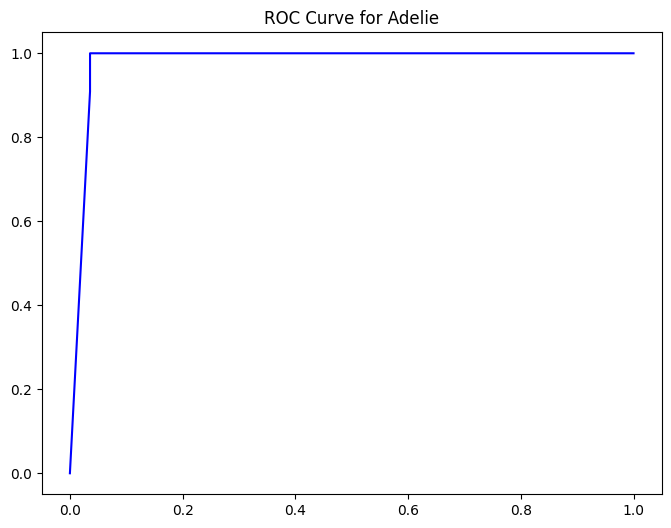

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
penguins["species"] = label_encoder.fit_transform(penguins["species"])

X = penguins.drop(columns=["species"])
y = penguins["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]),
        ("cat", OneHotEncoder(), ["island", "sex"])])

models = {
    "kNN (k=3)": Pipeline([
        ("preprocessor", preprocessor),
        ("knn", KNeighborsClassifier(n_neighbors=3))]),
    "kNN (k=5)": Pipeline([
        ("preprocessor", preprocessor),
        ("knn", KNeighborsClassifier(n_neighbors=5))]),
    "Decision Tree (Depth=3)": Pipeline([
        ("preprocessor", preprocessor),
        ("tree", DecisionTreeClassifier(max_depth=3, random_state=42))]),
    "Decision Tree (Depth=5)": Pipeline([
        ("preprocessor", preprocessor),
        ("tree", DecisionTreeClassifier(max_depth=5, random_state=42))])
}

# ChatGpt helped to streamline the code
for model_name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"\n--- {model_name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Overall Accuracy:", accuracy_score(y_test, y_pred))

tree_model = models["Decision Tree (Depth=3)"]
y_score = tree_model.predict_proba(X_test)

species_index = 0
fpr, tpr, thresholds = roc_curve((y_test == species_index).astype(int), y_score[:, species_index])
roc_auc = auc(fpr, tpr)

#Chatgpt helped with the Auc values
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.title(f"ROC Curve for Adelie")
plt.show()